In [17]:
#-----------------------------------------------#
#      Libraries used in this Project           #
#-----------------------------------------------#
import sys
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn import model_selection
from keras.utils.np_utils import to_categorical


Using TensorFlow backend.


In [18]:
#--------------------------------#
#      Reading the dataset       #
#--------------------------------#
data = pd.read_csv('dataset.csv')  

In [19]:
#------------------------------------------#
# Just Checking the sample of the dataset  #
#------------------------------------------#
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#---------------------------------------#
#  Printing the shape of the DataFrane  #
#---------------------------------------#
print('DataFrame: {}'.format(data.shape))
print(data.loc[1])

DataFrame: (303, 14)
age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64


In [21]:
#---------------------------------------------#
# Printing the last thirty or so data points  #
#---------------------------------------------#
data.loc[270:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0


In [22]:
#---------------------------------------------------------#
# Cleaning and Removing the missing data from the dataset #
#---------------------------------------------------------#
data1 = data[~data.isin(['?'])]
data1.loc[270:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0


In [23]:
#--------------------------------------------------#
# Dropping rows with NaN values from the DataFrame #
#--------------------------------------------------#
data = data.dropna(axis=0)
data.loc[270:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0


In [24]:
#-------------------------------------------------------#
# Printing the shape and the data type of the dataframe #
#-------------------------------------------------------#
print(data1.shape)
print(data1.dtypes)

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [25]:
#----------------------------------------------------------#
#  Transforming data to numeric to enable further analysis #
#----------------------------------------------------------#
data1 = data.apply(pd.to_numeric)
data1.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [26]:
#---------------------------------------------------------------------------#
# Printing data characteristics, usings pandas built-in describe() function #
#---------------------------------------------------------------------------#
data1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


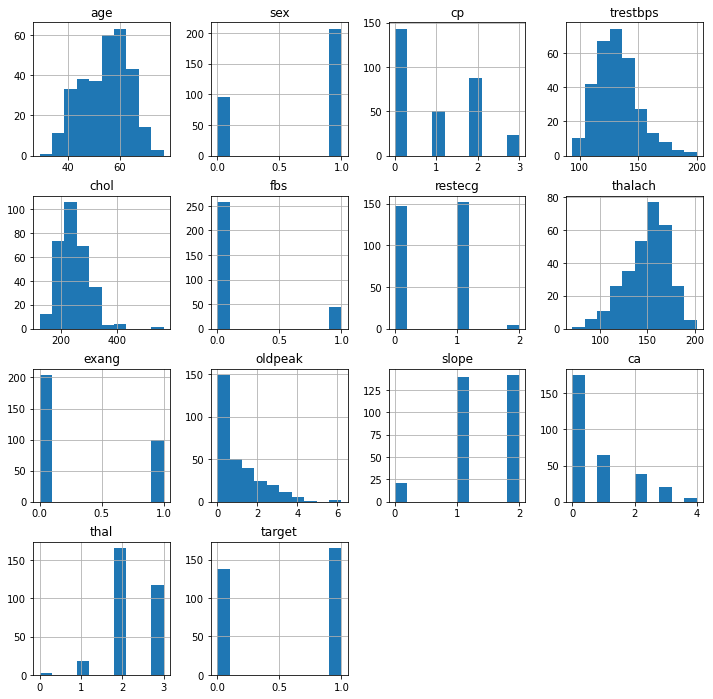

In [27]:
#---------------------------------------#
# Plotting histograms for each variable #
#---------------------------------------#
data1.hist(figsize = (12,12))
plt.show()

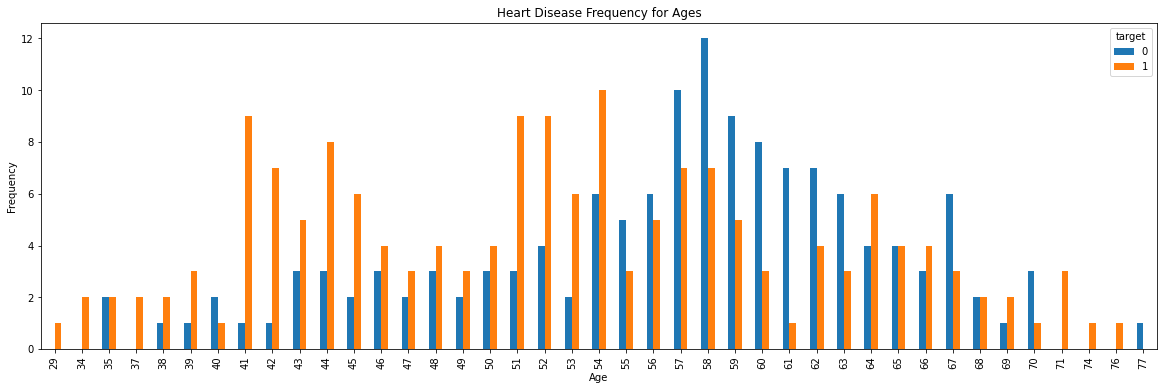

In [28]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


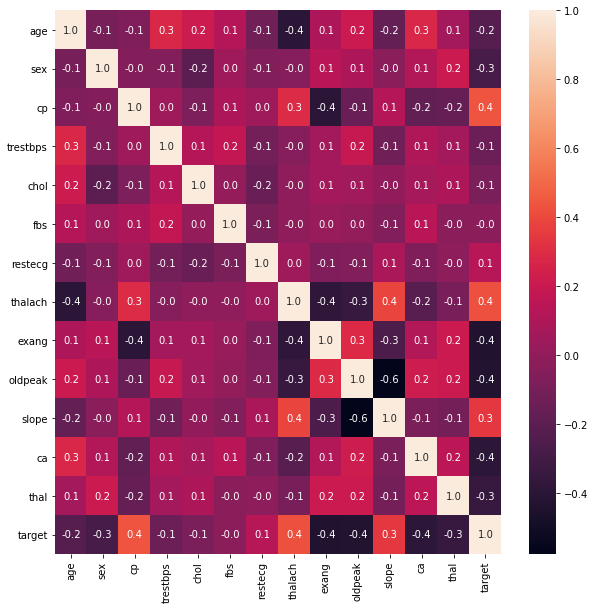

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

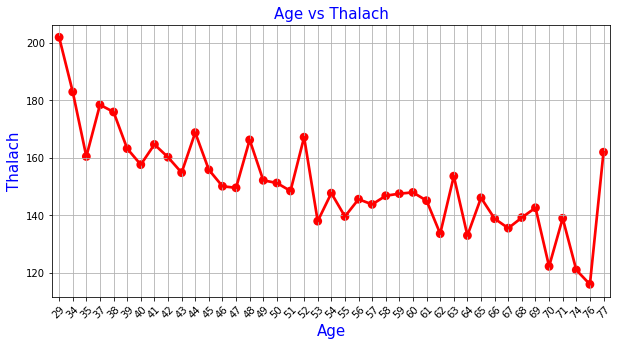

In [30]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [31]:
#--------------------------------------#
# Creating Trainig and testing Dataset #
#--------------------------------------#
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

In [32]:
X[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [33]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [34]:
X[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [35]:
#--------------------------------------#
# create X and Y datasets for training #
#--------------------------------------#
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [36]:
#---------------------------------------#
# convert the data to categorical labels#
#---------------------------------------#
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [37]:
X_train[0]

array([ 1.61392956, -1.46841752,  1.97312292,  0.47839125, -0.14038081,
       -0.41763453,  0.89896224,  0.05917329, -0.69663055,  0.65599028,
        0.97635214,  1.24459328, -0.51292188])